# GeoProcessing with Python - Chap. 11
## Map Algebra with NumPy and Scipy

by Chris Garrand

IPython Notebooks with some additions and adaptations by Claude COULOMBE - PhD - Montréal

Source: https://github.com/cgarrard/osgeopy-code

Download the code and install it using: sudo -H pip3 install <path-to-ospybook-latest.zip>

Data: https://app.box.com/v/osgeopy

In [2]:
# I use the print function in this code, even though I don't in the book text,
# so that you can run it as a regular script and still get the output. You only
# get output without using print if you're using the interactive window.

# Set this variable to your osgeopy-data directory so that the following
# examples will work without editing. We'll use the os.path.join() function
# to combine this directory and the filenames to make a complete path. Of
# course, you can type the full path to the file for each example if you'd
# prefer.

import os
import sys
import shutil
import numpy as np
import scipy.ndimage
import scipy.stats
from osgeo import gdal, osr
import ospybook as pb

# Set this variable to your osgeopy-data directory so that the following
# examples will work without editing. We'll use the os.path.join() function
# to combine this directory and the filenames to make a complete path. Of
# course, you can type the full path to the file for each example if you'd
# prefer.
# data_dir = r'D:\osgeopy-data'
# data_dir
data_dir = r'/home/user/Documents/osgeopy-data/osgeopy-data/'

print("GDAL version:",gdal.__version__)


GDAL version: 2.2.3


In [3]:
##############################  11.1 Intro to NumPy  ##########################

# Test out an array.
import numpy as np
a = np.arange(12)
print('a\n',a)
print('\na[1]\n',a[1])
print('\na[1:5]\n',a[1:5])

a
 [ 0  1  2  3  4  5  6  7  8  9 10 11]

a[1]
 1

a[1:5]
 [1 2 3 4]


In [4]:
a = np.reshape(a, (3,4))
print('a\n',a)
print('\na[1,2]\n',a[1,2])


a
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

a[1,2]
 6


In [5]:
# Change an array's shape.
a = np.reshape(a, (3,4))
print('a = np.reshape(a, (3,4)):\n')
print('a\n',a)
print('\na[1,2]\n',a[1,2])


a = np.reshape(a, (3,4)):

a
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

a[1,2]
 6


In [6]:
# Access entire rows or columns.
print('a\n',a)
print('\na[1]\n',a[1])
print('\na[:,2]\n',a[:,2])
print('\na[0:,2]\n',a[0:,2])


a
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

a[1]
 [4 5 6 7]

a[:,2]
 [ 2  6 10]

a[0:,2]
 [ 2  6 10]


In [7]:
# Access 2-dimensional slice.
print('a\n',a)
print('\na[1:,1:3]\n',a[1:,1:3])
print('\na[2,:-1]\n',a[2,:-1])
print('\na[2,0:-1]\n',a[2,0:-1])


a
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

a[1:,1:3]
 [[ 5  6]
 [ 9 10]]

a[2,:-1]
 [ 8  9 10]

a[2,0:-1]
 [ 8  9 10]


In [8]:
# Math
a = np.array([[1, 3, 4], [2, 7, 6]])
print('a = np.array([[1, 3, 4], [2, 7, 6]])')
print('\na\n',a)
b = np.array([[5, 2, 9], [3, 6, 4]])
print('\nb = np.array([[5, 2, 9], [3, 6, 4]]')
print('\nb\n',b)
print('\na + b\n',a + b)
print('\na > b\n',a > b)


a = np.array([[1, 3, 4], [2, 7, 6]])

a
 [[1 3 4]
 [2 7 6]]

b = np.array([[5, 2, 9], [3, 6, 4]]

b
 [[5 2 9]
 [3 6 4]]

a + b
 [[ 6  5 13]
 [ 5 13 10]]

a > b
 [[False  True False]
 [False  True  True]]


In [9]:
# Where
print('\na\n',a)
print('\nb\n',b)
print('\nnp.where(a > b, 10, 5)\n',np.where(a > b, 10, 5))
print('\nnp.where(a > b, a, b)\n',np.where(a > b, a, b))



a
 [[1 3 4]
 [2 7 6]]

b
 [[5 2 9]
 [3 6 4]]

np.where(a > b, 10, 5)
 [[ 5 10  5]
 [ 5 10 10]]

np.where(a > b, a, b)
 [[5 3 9]
 [3 7 6]]


In [10]:
# Access non-contiguous data.
a = np.random.randint(0, 20, 12)
print('a = np.random.randint(0, 20, 12)')
print('\na\n',a)
print('\na[[8, 0, 3]]\n',a[[8, 0, 3]])

a = np.reshape(a,(3, 4))
print('\na = np.reshape(a,(3, 4))')
print('\na\n',a)
print('\na[[2, 0, 0], [0, 0, 3]]\n',a[[2, 0, 0], [0, 0, 3]])


a = np.random.randint(0, 20, 12)

a
 [19  1  2  2 14 13 16  1  4 16 18 11]

a[[8, 0, 3]]
 [ 4 19  2]

a = np.reshape(a,(3, 4))

a
 [[19  1  2  2]
 [14 13 16  1]
 [ 4 16 18 11]]

a[[2, 0, 0], [0, 0, 3]]
 [ 4 19  2]


In [11]:
# Use Booleans
print('\na\n',a)
b = np.reshape(np.random.randint(0, 20, 12), (3, 4)) > 10
print('\nb = np.reshape(np.random.randint(0, 20, 12), (3, 4)) > 10')
print('\nb\n',b)
print('\na[b]\n',a[b])
print('\nnp.mean(a[a>5])\n',np.mean(a[a>5]))



a
 [[19  1  2  2]
 [14 13 16  1]
 [ 4 16 18 11]]

b = np.reshape(np.random.randint(0, 20, 12), (3, 4)) > 10

b
 [[ True False  True False]
 [ True False False False]
 [False  True  True  True]]

a[b]
 [19  2 14 16 18 11]

np.mean(a[a>5])
 15.285714285714286


In [12]:
# Create arrays.
print('np.zeros((3,2))\n',np.zeros((3,2)))
print('\nnp.ones((2,3), np.int)\n',np.ones((2,3), np.int))
print('\nnp.ones((2,3), np.int) * 5\n',np.ones((2,3), np.int) * 5)
print('\nnp.empty((2,2))\n',np.empty((2,2)))


np.zeros((3,2))
 [[0. 0.]
 [0. 0.]
 [0. 0.]]

np.ones((2,3), np.int)
 [[1 1 1]
 [1 1 1]]

np.ones((2,3), np.int) * 5
 [[5 5 5]
 [5 5 5]]

np.empty((2,2))
 [[1.71627734e-316 4.94065646e-324]
 [0.00000000e+000 0.00000000e+000]]


In [13]:
# Listing11_1.py
# Function to create a new 1-band raster and use projection
# and geotransform from another raster.

from osgeo import gdal

def make_raster(in_ds, fn, data, data_type, nodata=None):
    """Create a one-band GeoTIFF.

    in_ds     - datasource to copy projection and geotransform from
    fn        - path to the file to create
    data      - NumPy array containing data to write
    data_type - output data type
    nodata    - optional NoData value
    """
    driver = gdal.GetDriverByName('GTiff')
    out_ds = driver.Create(
        fn, in_ds.RasterXSize, in_ds.RasterYSize, 1, data_type)
    out_ds.SetProjection(in_ds.GetProjection())
    out_ds.SetGeoTransform(in_ds.GetGeoTransform())
    out_band = out_ds.GetRasterBand(1)
    if nodata is not None:
        out_band.SetNoDataValue(nodata)
    out_band.WriteArray(data)
    out_band.FlushCache()
    out_band.ComputeStatistics(False)
    return out_ds

print("Code loaded")

Code loaded


In [14]:
# Listing11_2.py
# Script to compute NDVI.
# The normalized difference vegetation index (NDVI) is used to measure “greenness" 
# NDVI uses red and near-infrared to compute a number in the range from -1 to 1.
# Growing plants use red wavelengths for photosynthesis, but reflect near-infrared
# so high ratio of these two measurements can indicate healthy vegetation. 

import os
import numpy as np
from osgeo import gdal
import ospybook as pb

# C.Coulombe add matplotlib in order to show images
# https://stackoverflow.com/questions/34165941/how-to-display-tiff-file-in-color
import matplotlib.pyplot as plt
# In order to avoid DecompressionBombError
from PIL import Image
Image.MAX_IMAGE_PIXELS = None

# os.chdir(r'D:\osgeopy-data\Massachusetts')
os.chdir(data_dir+'Massachusetts/')

in_fn = 'm_4207162_ne_19_1_20140718_20140923_clip.tif'

# C.Coulombe - show raster image
image = plt.imread('m_4207162_ne_19_1_20140718_20140923_clip.tif')
plt.figure(figsize=(8,8))
plt.title("Original raster image \n m_4207162_ne_19_1_20140718_20140923_clip.tif")
plt.imshow(image)
plt.show()

out_fn = 'ndvi.tif'

ds = gdal.Open(in_fn)
red = ds.GetRasterBand(1).ReadAsArray().astype(np.float)
nir = ds.GetRasterBand(4).ReadAsArray().astype(np.float)

# Mask the red band.
red = np.ma.masked_where(nir + red == 0, red)

# Do the calculation
ndvi = (nir - red) / (nir + red)

# Fill the empty cells.
ndvi = ndvi.filled(-99)

# Set NoData to the fill value when creating the new raster.
out_ds = pb.make_raster(
    ds, out_fn, ndvi, gdal.GDT_Float32, -99)

overviews = pb.compute_overview_levels(out_ds.GetRasterBand(1))
out_ds.BuildOverviews('average', overviews)

del ds, out_ds

<Figure size 800x800 with 1 Axes>

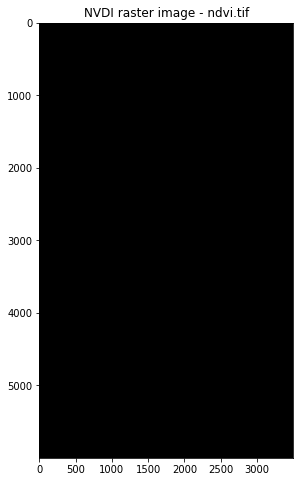

In [15]:
# C.Coulombe - show raster image
image = plt.imread('ndvi.tif')
plt.figure(figsize=(8,8))
plt.title("NVDI raster image - ndvi.tif")
plt.imshow(image)
plt.show()

C.Coulombe - since maplotlib imread() seems not working then we try using the rasterio package.

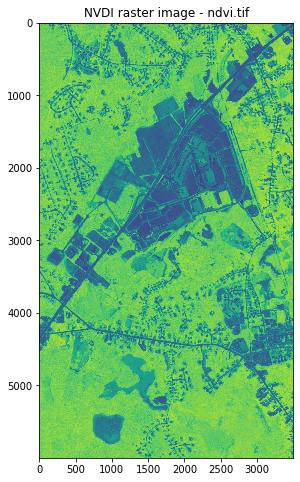

In [16]:
import rasterio
import matplotlib.pyplot as plt
# In order to avoid DecompressionBombError
from PIL import Image
Image.MAX_IMAGE_PIXELS = None
image_file = rasterio.open(data_dir+'Massachusetts/ndvi.tif')
image = image_file.read(1)
image_file.close()
plt.figure(figsize=(8,8))
plt.title("NVDI raster image - ndvi.tif")
_ = plt.imshow(image)


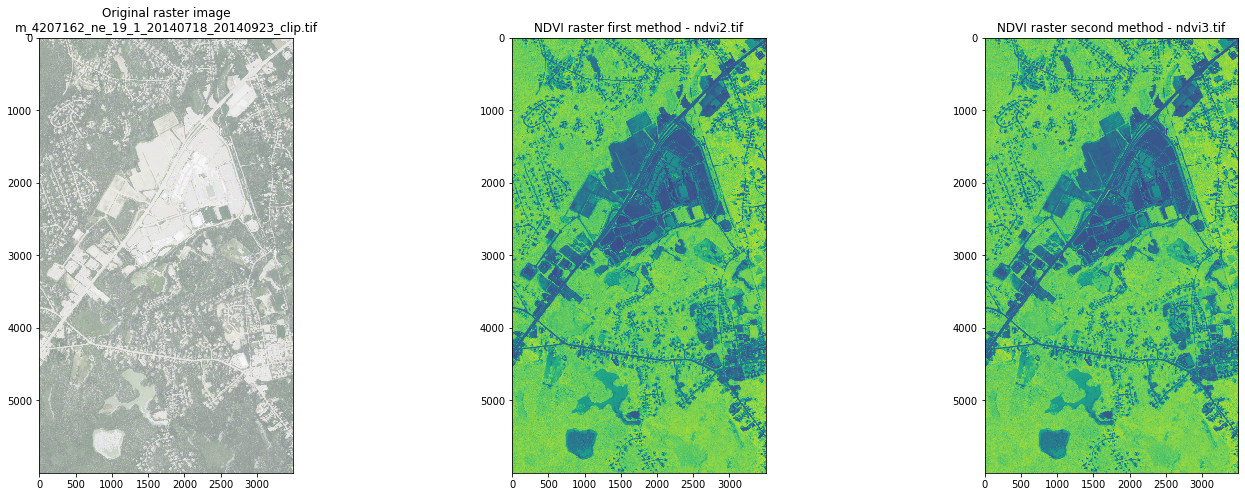

In [17]:
##############################  11.2 Map Algebra  #############################

###########################  11.2.1 Local Analyses  ###########################

# These examples are here because they're in the text, but really you should
# follow the method shown in listing 10.2.

os.chdir(os.path.join(data_dir, 'Massachusetts'))
in_fn = 'm_4207162_ne_19_1_20140718_20140923_clip.tif'

# C.Coulombe - show raster image
import matplotlib.pyplot as plt
# In order to avoid DecompressionBombError
from PIL import Image
Image.MAX_IMAGE_PIXELS = None
image = plt.imread('m_4207162_ne_19_1_20140718_20140923_clip.tif')
plt.figure(figsize=(24,8))
ax1 = plt.subplot(131)
ax1.title.set_text("Original raster image\nm_4207162_ne_19_1_20140718_20140923_clip.tif")
_ = ax1.imshow(image)

out_fn = 'ndvi2.tif'

ds = gdal.Open(in_fn)
red = ds.GetRasterBand(1).ReadAsArray().astype(np.float)
nir = ds.GetRasterBand(4).ReadAsArray()
red = np.ma.masked_where(nir + red == 0, red)

# This is the first method shown in the text.
ndvi = (nir - red) / (nir + red)
ndvi = np.where(np.isnan(ndvi), -99, ndvi)
ndvi = np.where(np.isinf(ndvi), -99, ndvi)
pb.make_raster(ds, 'ndvi2.tif', ndvi, gdal.GDT_Float32, -99)

# C.Coulombe - show raster image
import rasterio
image_file = rasterio.open(data_dir+'Massachusetts/ndvi2.tif')
image = image_file.read(1)
image_file.close()
ax2 = plt.subplot(132)
ax2.title.set_text("NDVI raster first method - ndvi2.tif")
_ = ax2.imshow(image)

# This is the second method shown in the text.
ndvi = np.where(nir + red > 0, (nir - red) / (nir + red), -99)
pb.make_raster(ds, 'ndvi3.tif', ndvi, gdal.GDT_Float32, -99)

# C.Coulombe - show raster image
image_file = rasterio.open(data_dir+'Massachusetts/ndvi3.tif')
image = image_file.read(1)
image_file.close()
ax3 = plt.subplot(133)
ax3.title.set_text("NDVI raster second method - ndvi3.tif")
_ = ax3.imshow(image)
plt.show()

del ds


In [18]:
###########################  11.2.2 Focal Analyses  ###########################
# Focal analyses use pixels surrounding a target pixel to compute a value
# for example to smooth data or remove random noise

indata  = np.array([
    [3, 5, 6, 4, 4, 3],
    [4, 5, 8, 9, 6, 5],
    [2, 2, 5, 7, 6, 4],
    [5, 7, 9, 8, 9, 7],
    [4, 6, 5, 7, 7, 5],
    [3, 2, 5, 3, 4, 4]])

print("indata\n",indata)

# a smoothing filter that computes the mean of a 3 x 3 moving window 
outdata =  np.zeros((6, 6))
outdata[2,2] = (indata[1,1] + indata[1,2] + indata[1,3] +
                indata[2,1] + indata[2,2] + indata[2,3] +
                indata[3,1] + indata[3,2] + indata[3,3]) / 9
print("\nsmooting indata[2,2]\n",outdata)

# DO NOT try this on a real image because it's way too slow.
rows, cols = indata.shape
outdata = np.zeros(indata.shape, np.float32)
for i in range(1, rows-1):
    for j in range(1, cols-1):
        outdata[i,j] = np.mean(indata[i-1:i+2, j-1:j+2])
print("\nsmooting indata with a slow iterative method\n",outdata)

# This one is fine, but is a pain to type out.
outdata = np.zeros(indata.shape, np.float32)
outdata[1:rows-1, 1:cols-1] = (
    indata[0:-2, 0:-2] + indata[0:-2, 1:-1] + indata[0:-2, 2:] +
    indata[1:-1, 0:-2] + indata[1:-1, 1:-1] + indata[1:-1, 2:] +
    indata[2:  , 0:-2] + indata[2:  , 1:-1] + indata[2:  , 2:]) / 9
print("\nsmooting indata with a fast slicing method but manually generated\n",outdata)

# Check out some slices
slices = []
for i in range(3):
    for j in range(3):
        slices.append(indata[i:rows-2+i, j:cols-2+j])
print("\nexamples of generated slices\n",slices)

# This is the upper left slice.
print('\nthe first generated slice, slices[0]\n',slices[0])

# Stack the slices and compute the mean.
stacked = np.dstack(slices)
outdata = np.zeros(indata.shape, np.float32)
outdata[1:-1, 1:-1] = np.mean(stacked, 2)
print("\nsmooting indata with a fast slicing method automatically generated\n",outdata)


indata
 [[3 5 6 4 4 3]
 [4 5 8 9 6 5]
 [2 2 5 7 6 4]
 [5 7 9 8 9 7]
 [4 6 5 7 7 5]
 [3 2 5 3 4 4]]

smooting indata[2,2]
 [[0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         6.66666667 0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]]

smooting indata with a slow iterative method
 [[0.        0.        0.        0.        0.        0.       ]
 [0.        4.4444447 5.6666665 6.111111  5.3333335 0.       ]
 [0.        5.2222223 6.6666665 7.4444447 6.7777777 0.       ]
 [0.        5.        6.2222223 7.        6.6666665 0.       ]
 [0.        5.111111  5.7777777 6.3333335 6.        0.       ]
 [0.        0.        0.        0.        0.        0.       ]]

smooting indata with a fast slicing 

In [22]:
###########################  11.2.3 Zonal Analyses  ###########################

# Function to get histogram bins.
def get_bins(data):
    """Return bin edges for all unique values in data. """
    bins = np.unique(data)
    return np.append(bins[~np.isnan(bins)], max(bins) + 1)

# Load the data from the figure.
os.chdir(os.path.join(data_dir, 'misc'))
landcover = gdal.Open('grid102.tif').ReadAsArray()
zones = gdal.Open('grid101.tif').ReadAsArray()

# Calculate the 2-way histogram.
hist, zone_bins, landcover_bins = np.histogram2d(
    zones.flatten(), landcover.flatten(),
    [get_bins(zones), get_bins(landcover)])
print(hist)


[[ 3.  1. 10.  4.  4.]
 [ 7.  5. 15.  8. 20.]
 [ 2.  0.  0.  7. 14.]]


In [23]:
# Listing11_3.py
# Function to get slices of any size from an array.

import numpy as np

def make_slices(data, win_size):
    """Return a list of slices given a window size.

    data     - two-dimensional array to get slices from
    win_size - tuple of (rows, columns) for the moving window
    """
    # Calculate the slice size
    rows = data.shape[0] - win_size[0] + 1
    cols = data.shape[1] - win_size[1] + 1
    slices = []

    # Loop through the rows and columns in the provided window size and
    # create each slice.
    for i in range(win_size[0]):
        for j in range(win_size[1]):
            slices.append(data[i:rows+i, j:cols+j])
    return slices

print("Code loaded")


Code loaded


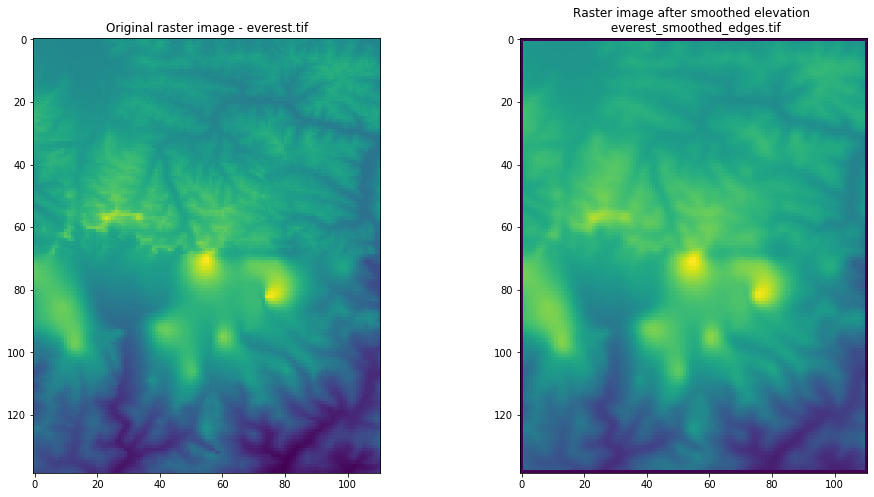

In [24]:
# Listing11_4.py
# Script to smooth an elevation dataset.

import os
import numpy as np
from osgeo import gdal
import ospybook as pb

# in_fn = r"D:\osgeopy-data\Nepal\everest.tif"
in_fn = data_dir + "Nepal/everest.tif"

# out_fn = r'D:\Temp\everest_smoothed_edges.tif'
out_fn = data_dir + "Nepal/everest_smoothed_edges.tif"

in_ds = gdal.Open(in_fn)
in_band = in_ds.GetRasterBand(1)
in_data = in_band.ReadAsArray()

# Stack the slices
slices = pb.make_slices(in_data, (3, 3))
stacked_data = np.ma.dstack(slices)

rows, cols = in_band.YSize, in_band.XSize

# Initialize an output array to the NoData value (-99)
out_data = np.ones((rows, cols), np.int32) * -99

# Put the result into the middle of the output, leaving the
# outside rows and columns alone, so they still have -99.
out_data[1:-1, 1:-1] = np.mean(stacked_data, 2)

pb.make_raster(in_ds, out_fn, out_data, gdal.GDT_Int32, -99)

del in_ds

# C.Coulombe - show raster image
# Here maplotlib imread() is not working 
# error unknown image mode, maybe transparency...
# So we're trying rasterio
import rasterio
import matplotlib.pyplot as plt
# In order to avoid DecompressionBombError
from PIL import Image
Image.MAX_IMAGE_PIXELS = None
image_file = rasterio.open(data_dir + "Nepal/everest.tif")
image = image_file.read(1)
image_file.close()
plt.figure(figsize=(16,8))
ax1 = plt.subplot(121)
ax1.title.set_text("Original raster image - everest.tif")
_ = ax1.imshow(image)

image_file = rasterio.open(data_dir + "Nepal/everest_smoothed_edges.tif")
image = image_file.read(1)
image_file.close()
ax2 = plt.subplot(122)
ax2.title.set_text("Raster image after smoothed elevation \n everest_smoothed_edges.tif")
_ = ax2.imshow(image)


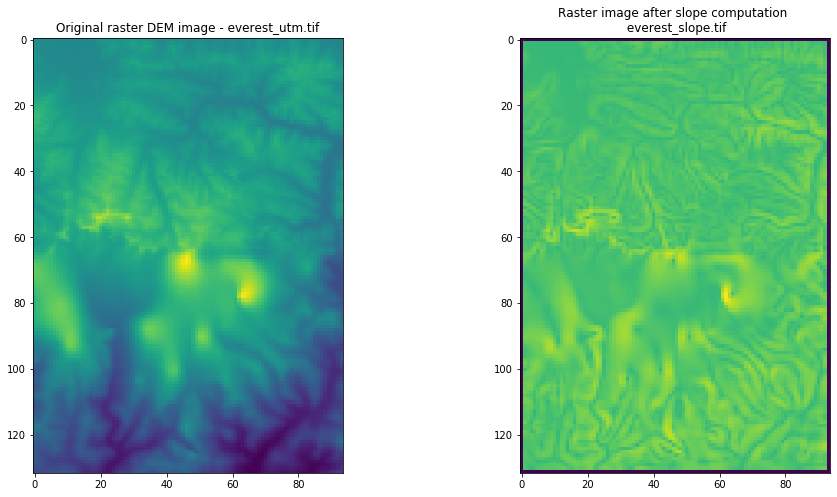

In [26]:
# Listing11_5.py
# Script to compute slope from a DEM.

import os
import numpy as np
from osgeo import gdal
import ospybook as pb

# in_fn = r"D:\osgeopy-data\Nepal\everest_utm.tif"
in_fn = data_dir + "Nepal/everest_utm.tif"

# out_fn = r'D:\Temp\everest_slope.tif'
out_fn = data_dir + "Nepal/everest_slope.tif"

# Get cell width and height.
in_ds = gdal.Open(in_fn)
cell_width = in_ds.GetGeoTransform()[1]
cell_height = in_ds.GetGeoTransform()[5]

# Read the data into a floating point array.
band = in_ds.GetRasterBand(1)
in_data = band.ReadAsArray().astype(np.float)

# Initialize the output array with -99.
out_data = np.ones((band.YSize, band.XSize)) * -99

# Make the slices.
slices = pb.make_slices(in_data, (3, 3))

# Compute the slope using the equations from the text.
rise = ((slices[6] + (2 * slices[7]) + slices[8]) -
        (slices[0] + (2 * slices[1]) + slices[2])) / \
       (8 * cell_height)
run =  ((slices[2] + (2 * slices[5]) + slices[8]) -
        (slices[0] + (2 * slices[3]) + slices[6])) / \
       (8 * cell_width)
dist = np.sqrt(np.square(rise) + np.square(run))

# The output from the last equation is inserted into the middle
# of the output array, ignoring the edges again.
out_data[1:-1, 1:-1] = np.arctan(dist) * 180 / np.pi

# Save the data.
pb.make_raster(in_ds, out_fn, out_data, gdal.GDT_Float32, -99)

del in_ds

# C.Coulombe - show raster image
import rasterio
import matplotlib.pyplot as plt
# In order to avoid DecompressionBombError
from PIL import Image
Image.MAX_IMAGE_PIXELS = None
image_file = rasterio.open(data_dir + "Nepal/everest_utm.tif")
image = image_file.read(1)
image_file.close()
plt.figure(figsize=(16,8))
ax1 = plt.subplot(121)
ax1.title.set_text("Original raster DEM image - everest_utm.tif")
_ = ax1.imshow(image)

image_file = rasterio.open(data_dir + "Nepal/everest_slope.tif")
image = image_file.read(1)
image_file.close()
ax2 = plt.subplot(122)
ax2.title.set_text("Raster image after slope computation \n everest_slope.tif")
_ = ax2.imshow(image)


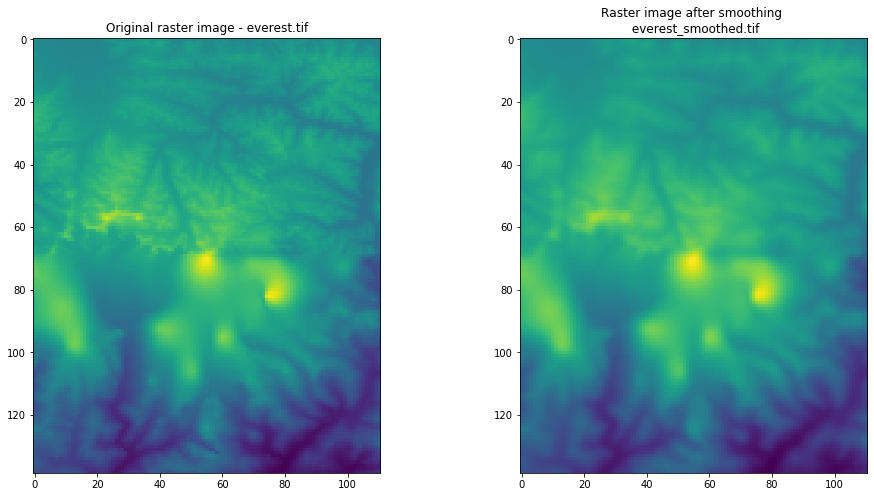

In [28]:
# Listing11_6.py
# Script that uses SciPy to smooth a DEM.

import os
import scipy.ndimage
from osgeo import gdal
import ospybook as pb


# in_fn = r"D:\osgeopy-data\Nepal\everest.tif"
in_fn = data_dir + "Nepal/everest.tif"

# out_fn = r'D:\Temp\everest_smoothed.tif'
out_fn = data_dir + "Nepal/everest_smoothed.tif"

in_ds = gdal.Open(in_fn)
in_data = in_ds.GetRasterBand(1).ReadAsArray()

# Use SciPy to run a 3x3 filter.
out_data = scipy.ndimage.filters.uniform_filter(
    in_data, size=3, mode='nearest')

pb.make_raster(in_ds, out_fn, out_data, gdal.GDT_Int32)

del in_ds

import rasterio
import matplotlib.pyplot as plt
# In order to avoid DecompressionBombError
from PIL import Image
Image.MAX_IMAGE_PIXELS = None
image_file = rasterio.open(data_dir + "Nepal/everest.tif")
image = image_file.read(1)
image_file.close()
plt.figure(figsize=(16,8))
ax1 = plt.subplot(121)
ax1.title.set_text("Original raster image - everest.tif")
_ = ax1.imshow(image)

image_file = rasterio.open(data_dir + "Nepal/everest_smoothed.tif")
image = image_file.read(1)
image_file.close()
ax2 = plt.subplot(122)
ax2.title.set_text("Raster image after smoothing \n everest_smoothed.tif")
_ = ax2.imshow(image)


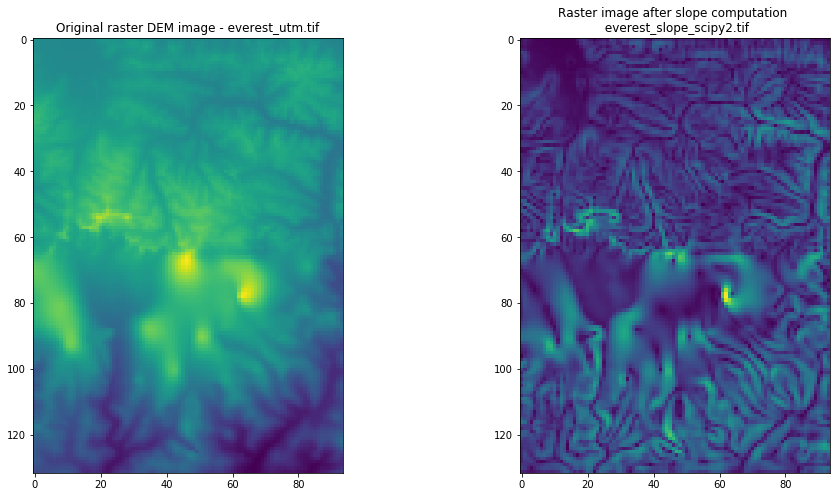

In [29]:
# Listing11_7.py
## Script to calculate slope using SciPy.

import os
import numpy as np
import scipy.ndimage
from osgeo import gdal
import ospybook as pb

# in_fn = r"D:\osgeopy-data\Nepal\everest_utm.tif"
in_fn = data_dir + "Nepal/everest_utm.tif"

# out_fn = r'D:\Temp\everest_slope_scipy2.tif'
out_fn = data_dir + "Nepal/everest_slope_scipy2.tif"

# Write a function that calculates slope using a 3x3 window.
# This will be passed to the SciPy filter function below.
def slope(data, cell_width, cell_height):
    """Calculates slope using a 3x3 window.

    data        - 1D array containing the 9 pixel values, starting
                  in the upper left and going left to right and down
    cell_width  - pixel width in the same units as the data
    cell_height - pixel height in the same units as the data
    """
    rise = ((data[6] + (2 * data[7]) + data[8]) -
            (data[0] + (2 * data[1]) + data[2])) / \
           (8 * cell_height)
    run =  ((data[2] + (2 * data[5]) + data[8]) -
            (data[0] + (2 * data[3]) + data[6])) / \
           (8 * cell_width)
    dist = np.sqrt(np.square(rise) + np.square(run))
    return np.arctan(dist) * 180 / np.pi

# Read the data as floating point.
in_ds = gdal.Open(in_fn)
in_band = in_ds.GetRasterBand(1)
in_data = in_band.ReadAsArray().astype(np.float32)

cell_width = in_ds.GetGeoTransform()[1]
cell_height = in_ds.GetGeoTransform()[5]

# Pass your slope function, along with the pixel size, to the
# generic_filter function. This will apply your function to
# each window, and each time it will pass the extra arguments
# in to the function along with the data.
out_data = scipy.ndimage.filters.generic_filter(
    in_data, slope, size=3, mode='nearest',
    extra_arguments=(cell_width, cell_height))

# Save the output
pb.make_raster(in_ds, out_fn, out_data, gdal.GDT_Float32)

del in_ds

# C.Coulombe - show raster image
import rasterio
import matplotlib.pyplot as plt
# In order to avoid DecompressionBombError
from PIL import Image
Image.MAX_IMAGE_PIXELS = None
image_file = rasterio.open(data_dir + "Nepal/everest_utm.tif")
image = image_file.read(1)
image_file.close()
plt.figure(figsize=(16,8))
ax1 = plt.subplot(121)
ax1.title.set_text("Original raster DEM image - everest_utm.tif")
_ = ax1.imshow(image)

image_file = rasterio.open(data_dir + "Nepal/everest_slope_scipy2.tif")
image = image_file.read(1)
image_file.close()
ax2 = plt.subplot(122)
ax2.title.set_text("Raster image after slope computation \n everest_slope_scipy2.tif")
_ = ax2.imshow(image)


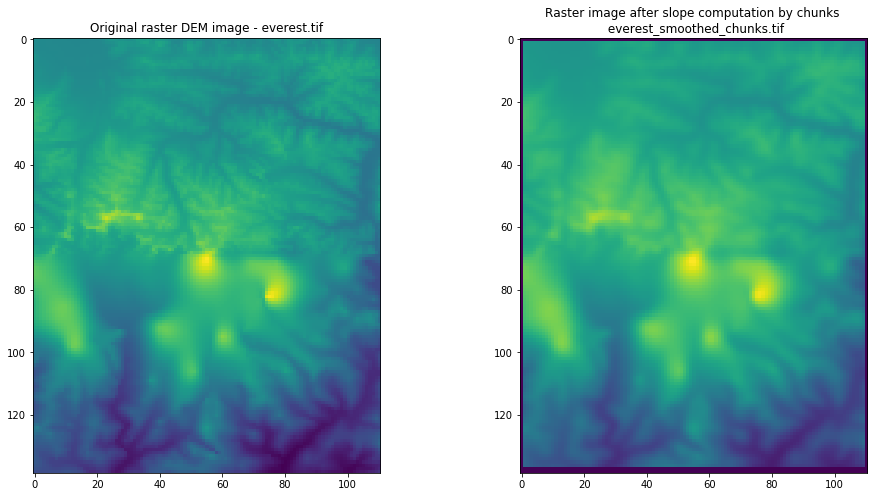

In [30]:
# Listing11_8.py
# Script to run a smoothing filter in chunks.

import os
import numpy as np
from osgeo import gdal
import ospybook as pb

# in_fn = r"D:\osgeopy-data\Nepal\everest.tif"
in_fn = data_dir + "Nepal/everest.tif"

# out_fn = r'D:\Temp\everest_smoothed_chunks.tif'
out_fn = data_dir + "Nepal/everest_smoothed_chunks.tif"

# Open the input.
in_ds = gdal.Open(in_fn)
in_band = in_ds.GetRasterBand(1)
xsize = in_band.XSize
ysize = in_band.YSize

# Create the empty output raster.
driver = gdal.GetDriverByName('GTiff')
out_ds = driver.Create(out_fn, xsize, ysize, 1, gdal.GDT_Int32)
out_ds.SetProjection(in_ds.GetProjection())
out_ds.SetGeoTransform(in_ds.GetGeoTransform())
out_band = out_ds.GetRasterBand(1)
out_band.SetNoDataValue(-99)

# Loop through the rows 100 at a time.
n = 100
for i in range(0, ysize, n):

    # Figure out how many rows can be read. Remember we want to read n + 2
    # rows if possible.
    if i + n + 1 < ysize:
        rows = n + 2
    else:
        rows = ysize - i

    # This makes sure we don't try to read off the top edge the first time
    # through.
    yoff = max(0, i - 1)

    # Read and process the data as before.
    in_data = in_band.ReadAsArray(0, yoff, xsize, rows)
    slices = pb.make_slices(in_data, (3, 3))
    stacked_data = np.ma.dstack(slices)
    out_data = np.ones(in_data.shape, np.int32) * -99
    out_data[1:-1, 1:-1] = np.mean(stacked_data, 2)

    # If it's the first time through, write the entire output array
    # starting at the first row. Otherwise, don't write the first row of
    # the output array because we don't want to overwrite good data from
    # the previous chunk. Because we're ignoring this first row, the row
    # offset needs to be increased.
    if yoff == 0:
        out_band.WriteArray(out_data)
    else:
        out_band.WriteArray(out_data[1:], 0, yoff + 1)

# Finish up.
out_band.FlushCache()
out_band.ComputeStatistics(False)

del out_ds, in_ds

# C.Coulombe - show raster image
import rasterio
import matplotlib.pyplot as plt
# In order to avoid DecompressionBombError
from PIL import Image
Image.MAX_IMAGE_PIXELS = None
image_file = rasterio.open(data_dir + "Nepal/everest.tif")
image = image_file.read(1)
image_file.close()
plt.figure(figsize=(16,8))
ax1 = plt.subplot(121)
ax1.title.set_text("Original raster DEM image - everest.tif")
_ = ax1.imshow(image)

image_file = rasterio.open(data_dir + "Nepal/everest_smoothed_chunks.tif")
image = image_file.read(1)
image_file.close()
ax2 = plt.subplot(122)
ax2.title.set_text("Raster image after slope computation by chunks \n everest_smoothed_chunks.tif")
_ = ax2.imshow(image)

In [4]:
# Listing11_9.py
# Zonal analysis with SciPy

import os
import numpy as np
import scipy.stats
from osgeo import gdal

def get_bins(data):
    """Return bin edges for all unique values in data."""
    bins = np.unique(data)
    return np.append(bins, max(bins) + 1)

# os.chdir(r'D:\osgeopy-data\Utah')
os.chdir(data_dir+'Utah/')
landcover_fn = 'landcover60.tif'
ecoregion_fn = 'utah_ecoIII60.tif'

# out_fn = r'D:\Temp\histogram.csv'
out_fn = 'histogram.csv'

# Read in the ecoregion data and get appropriate bins.
eco_ds = gdal.Open(ecoregion_fn)
eco_band = eco_ds.GetRasterBand(1)
eco_data = eco_band.ReadAsArray().flatten()
eco_bins = get_bins(eco_data)

# Read in the landcover data and get appropriate bins.
lc_ds = gdal.Open(landcover_fn)
lc_band = lc_ds.GetRasterBand(1)
lc_data = lc_band.ReadAsArray().flatten()
lc_bins = get_bins(lc_data)

# Calculate the histogram.
hist, eco_bins2, lc_bins2, bn = \
    scipy.stats.binned_statistic_2d(
        eco_data, lc_data, lc_data, 'count',
        [eco_bins, lc_bins])

# Add bin information to the histogram so the output file
# is more useful.
hist = np.insert(hist, 0, lc_bins[:-1], 0)
row_labels = np.insert(eco_bins[:-1], 0, 0)
hist = np.insert(hist, 0, row_labels, 1)

# Save the output
np.savetxt(out_fn, hist, fmt='%1.0f', delimiter=',')

print('Code executed')

Code executed


In [5]:
hist.shape

(9, 82)

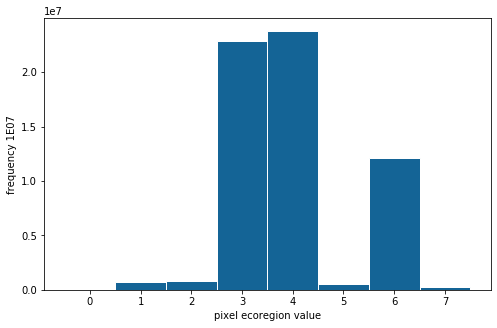

In [8]:
# C. Coulombe - Plot histogram
# I'm not sure if it's a useful representation...
import matplotlib.pyplot as plt
golden_number = 1.618
height = 10
width=int(golden_number*height)
plt.figure(figsize=(width/2,height/2))
_ = plt.hist(range(9), 
             bins=np.arange(9)-0.5, 
             color='#146496',
             edgecolor='white',
             weights=[hist[i].sum() for i in range(9)])
plt.xlabel('pixel ecoregion value')
plt.ylabel('frequency 1E07')
# plt.title("The approximate and exact histograms generated\nfrom the classified elevation raster ")
# plt.legend(loc='best')
plt.show()

In [9]:
# Example to create a one-dimensional bin instead of the 2-d one in

# data_dir = r'D:\osgeopy-data'

# Read in the ecoregion data and get appropriate bins.
os.chdir(os.path.join(data_dir, 'Utah'))

eco_ds = gdal.Open('utah_ecoIII60.tif')
eco_band = eco_ds.GetRasterBand(1)
eco_data = eco_band.ReadAsArray().flatten()
eco_bins = get_bins(eco_data)

lc_ds = gdal.Open('landcover60.tif')
lc_band = lc_ds.GetRasterBand(1)
lc_data = lc_band.ReadAsArray().flatten()
lc_bins = get_bins(lc_data)

# Function to calculate mode.
def my_mode(data):
    return scipy.stats.mode(data)[0]

# Get the histogram.
modes, bins, bn = scipy.stats.binned_statistic(
    eco_data, lc_data, my_mode, eco_bins)
print(modes)

ValueError: Input object to FillWithScalar is not a scalar

C. Coulombe - ValueError: Input object to FillWithScalar is not a scalar

Seems to be an error with recents versions of SciPy. To investigate...

In [ ]:
# Listing11_10.py
# Script to use proximity analysis and compute mean distance
# from roads.

import os
import sys
from osgeo import gdal, ogr

# folder = r'D:\osgeopy-data\Idaho'
folder = data_dir+"Idaho"
roads_ln = 'allroads'
wilderness_ln = 'wilderness'
road_raster_fn = 'church_roads.tif'
proximity_fn = 'proximity.tif'

# Set the cell size for the analysis.
cellsize = 10

shp_ds = ogr.Open(folder)

# Get the extent of the wilderness area.
wild_lyr = shp_ds.GetLayerByName(wilderness_ln)
wild_lyr.SetAttributeFilter("WILD_NM = 'Frank Church - RONR'")
envelopes = [row.geometry().GetEnvelope() for row in wild_lyr]
coords = list(zip(*envelopes))
minx, maxx = min(coords[0]), max(coords[1])
miny, maxy = min(coords[2]), max(coords[3])

# Select the roads that fall within the wilderness extent.
road_lyr = shp_ds.GetLayerByName(roads_ln)
road_lyr.SetSpatialFilterRect(minx, miny, maxx, maxy)

os.chdir(folder)
tif_driver = gdal.GetDriverByName('GTiff')

# Figure out the output size.
cols = int((maxx - minx) / cellsize)
rows = int((maxy - miny) / cellsize)

# Create an empty raster to hold the rasterized roads.
road_ds = tif_driver.Create(road_raster_fn, cols, rows)
road_ds.SetProjection(road_lyr.GetSpatialRef().ExportToWkt())
road_ds.SetGeoTransform((minx, cellsize, 0, maxy, 0, -cellsize))

# Burn the roads into the raster.
gdal.RasterizeLayer(
    road_ds, [1], road_lyr, burn_values=[1],
    callback=gdal.TermProgress)

# Burn proximity to roads into a new raster.
prox_ds = tif_driver.Create(proximity_fn, cols, rows, 1, gdal.GDT_Int32)
prox_ds.SetProjection(road_ds.GetProjection())
prox_ds.SetGeoTransform(road_ds.GetGeoTransform())
gdal.ComputeProximity(
    road_ds.GetRasterBand(1), prox_ds.GetRasterBand(1),
    ['DISTUNITS=GEO'], gdal.TermProgress)

# Burn the wilderness area into a temporary raster.
wild_ds = gdal.GetDriverByName('MEM').Create('tmp', cols, rows)
wild_ds.SetProjection(prox_ds.GetProjection())
wild_ds.SetGeoTransform(prox_ds.GetGeoTransform())
gdal.RasterizeLayer(
    wild_ds, [1], wild_lyr, burn_values=[1],
    callback=gdal.TermProgress)

# Use the temporary wilderness raster to set the proximity one
# to NoData everywhere that is outside the wilderness area.
wild_data = wild_ds.ReadAsArray()
prox_data = prox_ds.ReadAsArray()
prox_data[wild_data == 0] = -99
prox_ds.GetRasterBand(1).WriteArray(prox_data)
prox_ds.GetRasterBand(1).SetNoDataValue(-99)
prox_ds.FlushCache()

# Compute statistics and calculate the mean distance to roads,
# which is just the mean value of the proximity raster.
stats = prox_ds.GetRasterBand(1).ComputeStatistics(
    False, gdal.TermProgress)
print('Mean distance from roads is', stats[2])

del prox_ds, road_ds,  shp_ds


Mean distance from roads is 3944.3602976445204


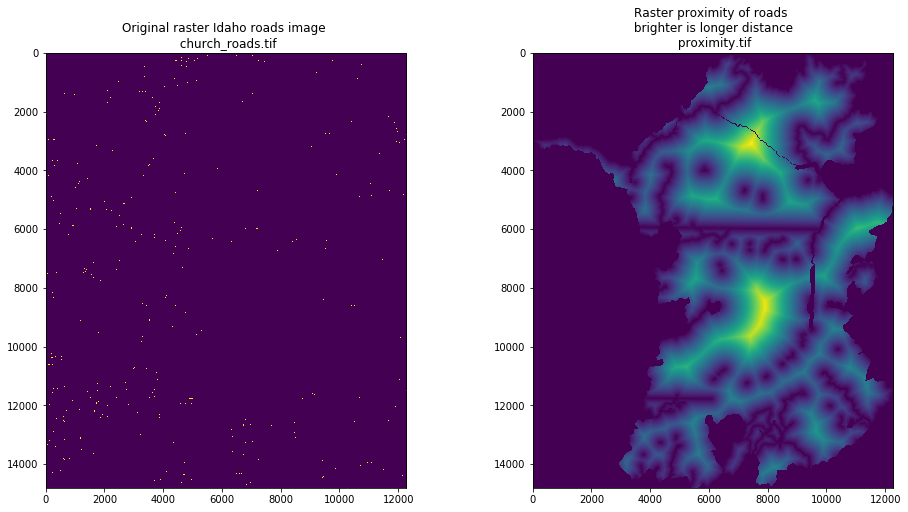

In [6]:
# C.Coulombe - show raster image
import rasterio
import matplotlib.pyplot as plt
# In order to avoid DecompressionBombError
from PIL import Image
Image.MAX_IMAGE_PIXELS = None
image_file = rasterio.open(data_dir + "Idaho/church_roads.tif")
image = image_file.read(1)
image_file.close()
plt.figure(figsize=(16,8))
ax1 = plt.subplot(121)
ax1.title.set_text("Original raster Idaho roads image \n church_roads.tif")
_ = ax1.imshow(image)

# C.Coulombe - show raster image
image_file = rasterio.open(data_dir + "Idaho/proximity.tif")
image = image_file.read(1)
image_file.close()
ax2 = plt.subplot(122)
ax2.title.set_text("Raster proximity of roads \n brighter is longer distance \n proximity.tif")
_ = ax2.imshow(image)

plt.show()

In [7]:
# Listing11_11.py
def make_resample_slices(data, win_size):
    """Return a list of resampled slices given a window size.

    data     - two-dimensional array to get slices from
    win_size - tuple of (rows, columns) for the input window
    """
    row = int(data.shape[0] / win_size[0]) * win_size[0]
    col = int(data.shape[1] / win_size[1]) * win_size[1]
    slices = []

    for i in range(win_size[0]):
        for j in range(win_size[1]):
            slices.append(data[i:row:win_size[0], j:col:win_size[1]])
    return slices

print('Code loaded')

Code loaded


In [8]:
# Listing11_12.py
import numpy as np

def get_indices(source_ds, target_width, target_height):
    """Returns x, y lists of all possible resampling offsets.

    source_ds     - dataset to get offsets from
    target_width  - target pixel width
    target_height - target pixel height (negative)
    """
    source_geotransform = source_ds.GetGeoTransform()
    source_width = source_geotransform[1]
    source_height = source_geotransform[5]
    dx = target_width / source_width
    dy = target_height / source_height
    target_x = np.arange(dx / 2, source_ds.RasterXSize, dx)
    target_y = np.arange(dy / 2, source_ds.RasterYSize, dy)
    return np.meshgrid(target_x, target_y)

print('Code loaded')

Code loaded


In [19]:
###########################  11.13 Resampling Data  ###########################

# Make some test data.
data = np.reshape(np.arange(24), (4, 6))
print("test data\n",data)

# Keep every other cell.
print("\ntest data, even indexes (row and column)\n",data[::2, ::2])

# Keep every other cell, but start at the second row and column.
print("\ntest data, odd indexes, but start at the second row and column\n",data[1::2, 1::2])

# Repeat each column.
print("\ntest data, repeat each column\n",np.repeat(data, 2, 1))

# Repeat columns and rows.
print("\ntest data, repeat columns and rows\n",np.repeat(np.repeat(data, 2, 0), 2, 1))

# Import the listing so we can use get_indices.
# import listing11_12

# Here's a small sample grid so you can see what's happening.
fn = os.path.join(data_dir, 'misc', 'smallgrid.tif')

ds = gdal.Open(fn)
data = ds.ReadAsArray()
# x, y = listing11_12.get_indices(ds, 25, -25)
x, y = get_indices(ds, 25, -25)
new_data = data[y.astype(int), x.astype(int)]

print("\nsmall grid data\n",data)
print("\nsmall grid, get_indices(ds, 25, -25)\n",new_data)


test data
 [[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]

test data, even indexes (row and column)
 [[ 0  2  4]
 [12 14 16]]

test data, odd indexes, but start at the second row and column
 [[ 7  9 11]
 [19 21 23]]

test data, repeat each column
 [[ 0  0  1  1  2  2  3  3  4  4  5  5]
 [ 6  6  7  7  8  8  9  9 10 10 11 11]
 [12 12 13 13 14 14 15 15 16 16 17 17]
 [18 18 19 19 20 20 21 21 22 22 23 23]]

test data, repeat columns and rows
 [[ 0  0  1  1  2  2  3  3  4  4  5  5]
 [ 0  0  1  1  2  2  3  3  4  4  5  5]
 [ 6  6  7  7  8  8  9  9 10 10 11 11]
 [ 6  6  7  7  8  8  9  9 10 10 11 11]
 [12 12 13 13 14 14 15 15 16 16 17 17]
 [12 12 13 13 14 14 15 15 16 16 17 17]
 [18 18 19 19 20 20 21 21 22 22 23 23]
 [18 18 19 19 20 20 21 21 22 22 23 23]]

small grid data
 [[206 253  95   3  69]
 [229   6 222 235 183]
 [121  89  43 178   1]
 [118 204  34  81 121]
 [235   7 107 208 199]]

small grid, get_indices(ds, 25, -25)
 [[  6 235]
 [204  81]]


In [16]:
# Listing11_13.py

def bilinear(in_data, x, y):
    """Performs bilinear interpolation.

    in_data - the input dataset to be resampled
    x       - an array of x coordinates for output pixel centers
    y       - an array of y coordinates for output pixel centers
    """
    x -= 0.5
    y -= 0.5
    x0 = np.floor(x).astype(int)
    x1 = x0 + 1
    y0 = np.floor(y).astype(int)
    y1 = y0 + 1

    ul = in_data[y0, x0] * (y1 - y) * (x1 - x)
    ur = in_data[y0, x1] * (y1 - y) * (x - x0)
    ll = in_data[y1, x0] * (y - y0) * (x1 - x)
    lr = in_data[y1, x1] * (y - y0) * (x - x0)

    return ul + ur + ll + lr

print('Code loaded')

Code loaded


In [20]:
####################  Resampling with GDAL command line utilities  ###########################

import subprocess

# C. Coulombe- in order to 
os.chdir(data_dir+'Nepal')

args = [
    'gdalwarp',
    '-tr', '0.02', '0.02',
    '-r', 'bilinear',
    'everest.tif', 'everest_resample.tif']
result = subprocess.call(args)

print(result)

0


C. Coulombe - without the line `os.chdir(data_dir+'Nepal')` I've got an exit status 2 that indicated an error, I've guessed that it was due to the wrong default directory path. Goog guess!

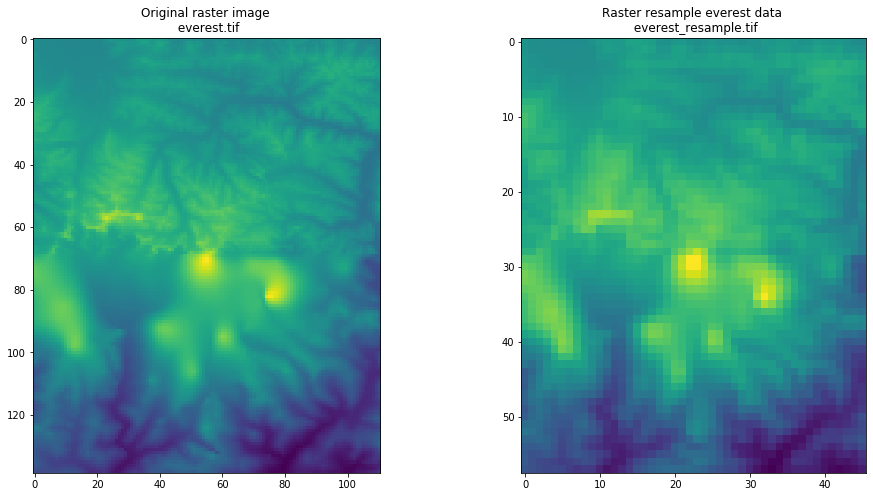

In [21]:
# C.Coulombe - show raster image
import rasterio
import matplotlib.pyplot as plt
# In order to avoid DecompressionBombError
from PIL import Image
Image.MAX_IMAGE_PIXELS = None
image_file = rasterio.open(data_dir + "Nepal/everest.tif")
image = image_file.read(1)
image_file.close()
plt.figure(figsize=(16,8))
ax1 = plt.subplot(121)
ax1.title.set_text("Original raster image \n everest.tif")
_ = ax1.imshow(image)

# C.Coulombe - show raster image
image_file = rasterio.open(data_dir + "Nepal/everest_resample.tif")
image = image_file.read(1)
image_file.close()
ax2 = plt.subplot(122)
ax2.title.set_text("Raster resample everest data \n everest_resample.tif")
_ = ax2.imshow(image)

plt.show()